# Linear Algebra in AI and ML 

## <b>Assignment 1</b>
#### Hardik Pravin Soni
#### 20CS30023

# Importing All Required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pandas import DataFrame
from keras.datasets import mnist

# Data PreProcessing

In [ ]:
def get_data():
    (X_train, Y_train), (X_test, Y_test) = mnist.load_data()

    # reshape matrix to vector
    X_train, X_test = X_train.reshape(X_train.shape[0], -1), X_test.reshape(X_test.shape[0], -1)

    # scale values to 0-1
    X_train = X_train/255.0
    X_test = X_test/255.0

    train_data = []
    train_labels = []
    for i in range(10):
        train_labels += [i]*100
        temp_data = X_train[np.where(Y_train == i)[0]]
        np.random.shuffle(temp_data)
        train_data.extend(temp_data[:100])
    
    train_data, train_labels = np.array(train_data), np.array(train_labels)
    idx = np.random.permutation(len(train_data))
    train_data, train_labels = train_data[idx], train_labels[idx]

    idx = np.random.permutation(len(X_test))
    test_data, test_labels = X_test[idx][:50], Y_test[idx][:50]
    return (train_data, train_labels), (test_data, test_labels)

(x_train, y_train), (x_test, y_test) = get_data()
print(f"N = number of training examples = {x_train.shape[0]}")
print(f"n = number of features = {x_train.shape[1]}")

N = number of training examples = 1000
n = number of features = 784


# KMeans Class Implementation

In [ ]:
class KMeans():
    def __init__(self, x, y, cluster_cnt = 20, random_init = 1):
        self.data = x
        self.labels = y
        self.feature_len = self.data.shape[1]
        self.train_len = self.data.shape[0]
        self.clusters = np.zeros(self.train_len, dtype=int)
        self.cluster_cnt = cluster_cnt
        self.cluster_centers = np.random.uniform(size=(self.cluster_cnt, self.feature_len))
        self.cluster_labels = -1*np.ones(self.cluster_cnt, dtype=int)
        if random_init == 0:
            self.cluster_centers = self.data[np.random.randint(0, self.train_len, self.cluster_cnt)]
        self.j_clust = []
    
    def get_distance(self, x, y):
        return np.linalg.norm(x-y, 2)

    def get_j_clust(self):
        return np.mean(np.array([self.get_distance(self.data[i], self.cluster_centers[self.clusters[i]]) for i in range(self.train_len)]))
    
    def check_convergence(self):
        if len(self.j_clust) < 2:
            return False
        return np.absolute(self.j_clust[-1] - self.j_clust[-2]) < 1e-6
  
    
    def train(self, max_iterations = 1000, info = False):
        for i in range(max_iterations):
            # Updatding Cluster Assignments
            for i in range(self.train_len):
              self.clusters[i] = np.argmin(np.array([self.get_distance(self.data[i], c) for c in self.cluster_centers]))

            # Updating Cluster Representives
            for i in range(self.cluster_cnt):
              idx = np.where(self.clusters == i)[0]
              if idx.shape[0] == 0:
                  self.cluster_centers[i] = np.zeros(self.feature_len)
              else:
                  self.cluster_centers[i] = np.mean(self.data[idx], axis=0)

            # Updating Cluster Labels
            self.cluster_labels = -1*np.ones(self.cluster_cnt, dtype=int)
            for i in range(self.cluster_cnt):
                freq = np.bincount(self.labels[np.where(self.clusters == i)])
                if freq.shape[0]:
                  self.cluster_labels[i]=np.argmax(freq)
      
            # Appending to j_cluster to store store results

            self.j_clust.append(self.get_j_clust())
      
            if info:
                print(f"Iteration {i+1}: j_clust = {self.j_clust[-1]}")
            if self.check_convergence():
                print(f"Converged after {i+1} iterations.")
                return self.j_clust[-1]
            
        print(f"Max iterations reached.")
        return self.j_clust[-1]
    
    def test(self, x, y):
        predicted_clusters = np.array( [np.argmin(np.array([self.get_distance(x_i, c) for c in self.cluster_centers])) for x_i in x] )
        predicted_values = self.cluster_labels[predicted_clusters]
        return np.mean(np.equal(predicted_values, y))

    def visualise_cluster_representatives(self):
        dims = int(np.sqrt(self.feature_len))
        images = self.cluster_centers.reshape((self.cluster_cnt, dims, dims))
        fig, axs = plt.subplots(5, 4, figsize=(14, 14))
        plt.gray()
        for i, a in enumerate(axs.flat):
            a.matshow(images[i])
            a.axis('off')
            a.text(-4.0, -2.0, f"Value = {self.cluster_labels[i]}")
        fig.suptitle("Cluster Representatives", fontsize=30)
        plt.show()
    
    def visualise_j_clust(self):
        plt.xlabel('Iterations')
        plt.ylabel('J_Clust')
        plt.plot(range(len(self.j_clust)), self.j_clust)
        plt.show()


# Results and Visualisation (Part a and b)

Converged after 20 iterations.
Test Accuracy is: 0.74
Train Accuracy is: 0.661


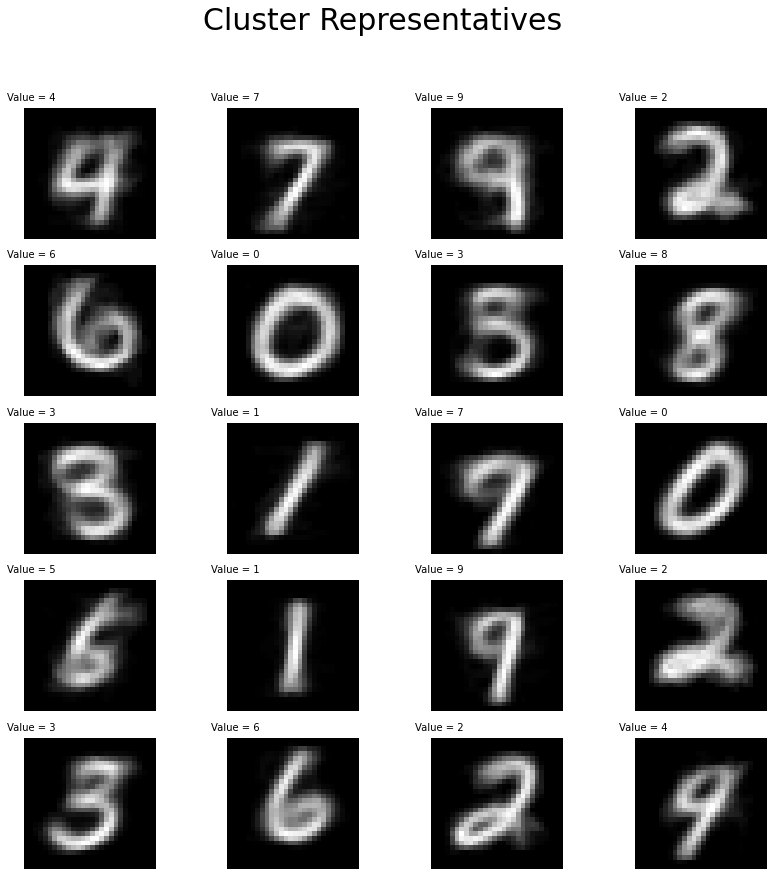

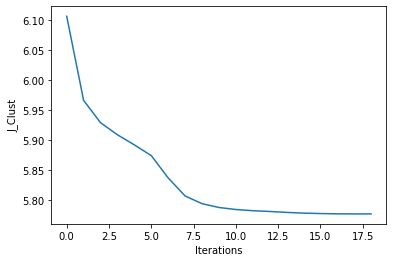

In [ ]:
# for case(ii) pass random_init = 0
kmeans_trainer = KMeans(x_train, y_train) 
kmeans_trainer.train()
print(f"Test Accuracy is: {kmeans_trainer.test(x_test, y_test)}")
print(f"Train Accuracy is: {kmeans_trainer.test(x_train, y_train)}")
kmeans_trainer.visualise_cluster_representatives()
kmeans_trainer.visualise_j_clust()


# Variation in number of clusters (Part C)

Converged after 5 iterations.
Converged after 6 iterations.
Converged after 7 iterations.
Converged after 8 iterations.
Converged after 9 iterations.
Converged after 10 iterations.
Converged after 11 iterations.
Converged after 12 iterations.
Converged after 13 iterations.
Converged after 14 iterations.
Converged after 15 iterations.
Converged after 16 iterations.
Converged after 17 iterations.
Converged after 18 iterations.
Converged after 19 iterations.
Converged after 20 iterations.
Min J_clust = 5.790413544305315 for k = 20
k = 5, J_clust = 6.490830181374058
k = 6, J_clust = 6.4622847327888016
k = 7, J_clust = 6.324576122306834
k = 8, J_clust = 6.265369819452733
k = 9, J_clust = 6.22225903939423
k = 10, J_clust = 6.126557642399606
k = 11, J_clust = 6.11723199074083
k = 12, J_clust = 6.0386687773903835
k = 13, J_clust = 5.995731399936434
k = 14, J_clust = 5.9454466082565505
k = 15, J_clust = 5.945566023102394
k = 16, J_clust = 5.921975325513757
k = 17, J_clust = 5.854224551668884
k 

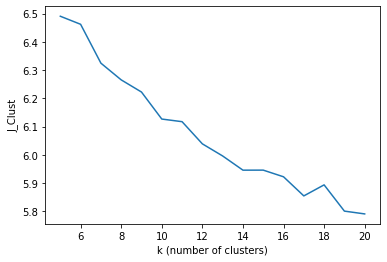

In [ ]:
cluster_range = range(5, 21)
j_clust_values = []
for i in cluster_range:
    kmeans_trainer = KMeans(x_train, y_train, cluster_cnt = i) # for case(ii) pass random_init = 0
    j_clust_values.append(kmeans_trainer.train())

j_clust_values = np.array(j_clust_values)
min_j_clust = np.min(j_clust_values)
k_min = cluster_range[np.argmin(j_clust_values)]
print(f"Min J_clust = {min_j_clust} for k = {k_min}")
for i, val in enumerate(j_clust_values):
    print(f"k = {i+5}, J_clust = {val}")
plt.xlabel('k (number of clusters)')
plt.ylabel('J_Clust')
plt.plot(cluster_range, j_clust_values)
plt.show()